In [32]:
#import libraries to use for my analysis and visualizations. Then read the file.
import numpy as np
import pandas as pd
import sklearn
 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

%matplotlib inline
df=pd.read_csv('Churn_Clean209.csv')

In [33]:
#Remove columns that are not relevent to the question being addressed in this analysis or are redundant
df=df.drop(columns=['CaseOrder','Customer_id','Interaction','UID', 'Lat','Lng','Population','TimeZone','State','Zip','City','County','Job','Children','Techie'])

In [34]:
#Source (pandas.factorize¶)
#change categorical variables to numerical so that we can use them in them in the model
df.Area= pd.factorize(df.Area)[0]
df.Marital= pd.factorize(df.Marital)[0]
df.Gender= pd.factorize(df.Gender)[0]
df.Churn= pd.factorize(df.Churn)[0]
df.Contract= pd.factorize(df.Contract)[0]
df.Port_modem= pd.factorize(df.Port_modem)[0]
df.Tablet= pd.factorize(df.Tablet)[0]
df.InternetService= pd.factorize(df.InternetService)[0]
df.Phone= pd.factorize(df.Phone)[0]
df.Multiple= pd.factorize(df.Multiple)[0]
df.OnlineSecurity= pd.factorize(df.OnlineSecurity)[0]
df.OnlineBackup= pd.factorize(df.OnlineBackup)[0]
df.DeviceProtection= pd.factorize(df.DeviceProtection)[0]
df.TechSupport= pd.factorize(df.TechSupport)[0]
df.StreamingTV= pd.factorize(df.StreamingTV)[0]
df.StreamingMovies= pd.factorize(df.StreamingMovies)[0]
df.PaperlessBilling= pd.factorize(df.PaperlessBilling)[0]
df.PaymentMethod= pd.factorize(df.PaymentMethod)[0]

In [35]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
# Create arrays for the features and the response variable
y = df['Churn'].values
X = df.drop('Churn', axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 34) (2000, 34) (8000,) (2000,)


In [37]:
df2 = pd.DataFrame(y_train)
df2.to_csv('y_train.csv',index=False)
df3 = pd.DataFrame(X_train)
df3.to_csv('x_train.csv',index=False)
df4 = pd.DataFrame(y_test)
df4.to_csv('y_test.csv',index=False)
df5 = pd.DataFrame(X_test)
df5.to_csv('x_test.csv',index=False)


In [38]:
# Source (Robinson, K-Nearest Neighbors Algorithm in Python and Scikit-Learn)
#scale data since it needs to have the same min, max values in order to complete the KNN
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
#calculate the square root of the number of tuples in order to estimate k
import math
math.sqrt(len(y_test))

44.721359549995796

In [40]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
# Create a k-NN classifier with 43 neighbors
knn = KNeighborsClassifier(n_neighbors=43)

# Fit the classifier to the training data
knn.fit(X_train, y_train)  

# Predict the labels for the training data X: y_pred
y_pred = knn.predict(X_test)

In [41]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
#calculate metrics to evaluate algorithm by creating a confusion matrix
print(confusion_matrix(y_test, y_pred))
#evaluate the KNN model by viewing the confusion matrix and F1 score
cm=confusion_matrix(y_test,y_pred)
print(f1_score(y_test,y_pred))

[[1358   84]
 [ 245  313]]
0.6554973821989529


In [42]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
#create a classification report which shows the metrics that can be used to show how well the knn performed.
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1442
           1       0.79      0.56      0.66       558

    accuracy                           0.84      2000
   macro avg       0.82      0.75      0.77      2000
weighted avg       0.83      0.84      0.83      2000



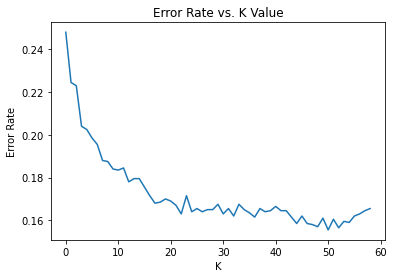

In [43]:
# Source (Robinson, K-Nearest Neighbors Algorithm in Python and Scikit-Learn)
# Calculating mean error for K values between 1 and 60 to use to determine best k
error = []

for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
#View a graph of error rate to determine best K value
plt.plot( error)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [44]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
# Create a k-NN classifier with 48 neighbors to see if that would improve my model (f1 value)
knn = KNeighborsClassifier(n_neighbors=48)

# Fit the classifier to the training data
knn.fit(X_train, y_train)  

# Predict the labels for the training data X: y_pred
y_pred = knn.predict(X_test) 

In [45]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
#calculate metrics to evaluate algorithm
print(confusion_matrix(y_test, y_pred))
#evaluate the KNN model
cm=confusion_matrix(y_test,y_pred)
 
print(f1_score(y_test,y_pred))

[[1377   65]
 [ 251  307]]
0.6602150537634408


In [46]:
#Source (Train/Test Split + Fit/Predict/Accuracy)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1442
           1       0.83      0.55      0.66       558

    accuracy                           0.84      2000
   macro avg       0.84      0.75      0.78      2000
weighted avg       0.84      0.84      0.83      2000



In [48]:
#Area under the curve shows how well the model distinguished the classes.
print('AUC-ROC:',roc_auc_score(y_test, y_pred))

AUC-ROC: 0.7525514642645867
